## Capital Asset Pricing Model (CAPM)
### Strength Training with Functions, Numpy


### University of Virginia
### Programming for Data Science
### Last Updated: June 29, 2021
---

### Objectives: 
- Use numpy and functions to compute a stock's CAPM beta
- Perform sensitivity analysis to understand how the data points impact the beta estimate

### Background


In finance, CAPM is a single-factor regression model used for explaining and predicting excess stock returns. There are better, more accurate models, but it has its uses. For example, the *market beta* is a useful output.


Here is the formula for calculating the expected excess return:

\begin{aligned} &E[R_i] - R_f  = \beta_i ( E[R_m] - R_f ) \\ \\ &\textbf{where:} \\ &ER_i = \text{expected return of stock i} \\ &R_f = \text{risk-free rate} \\ &\beta_i = \text{beta of the stock} \\ &ER_m - R_f = \text{market risk premium} \\ \end{aligned} 

#### Review the instructions below to complete the requested tasks.

#### TOTAL POINTS: 10
---  


In [1]:
# load modules
import numpy as np
import pandas as pd

# risk-free Treasury rate
R_f = 0.0175 / 252

In [2]:
# read in the market data
data = pd.read_csv('capm_market_data.csv')

Look at some records  
SPY is an ETF for the S&P 500 (the "stock market")  
AAPL is Apple  
The values are closing prices, adjusted for splits and dividends

In [4]:
data.head()

,date,spy_adj_close,aapl_adj_close
0,2020-01-02,321.555786,298.829956
1,2020-01-03,319.120911,295.924713
2,2020-01-06,320.338379,298.282715
3,2020-01-07,319.437653,296.879883
4,2020-01-08,321.140106,301.655548


Drop the date column

In [25]:
no_date = data.drop('date', axis = 1)
no_date.head()

,spy_adj_close,aapl_adj_close
0,321.555786,298.829956
1,319.120911,295.924713
2,320.338379,298.282715
3,319.437653,296.879883
4,321.140106,301.655548


Compute daily returns (percentage changes in price) for SPY, AAPL  
Be sure to drop the first row of NaN  
Hint: pandas has functions to easily do this

In [26]:
no_date["daily_returns_spy"] = no_date["spy_adj_close"].pct_change() * 100
no_date["daily_returns_aapl"] = no_date["aapl_adj_close"].pct_change() * 100
daily_return = no_date.dropna()

#### 1. (1 PT) Print the first 5 rows of returns

In [27]:
daily_returns = daily_return.drop(["spy_adj_close", "aapl_adj_close"], axis = 1)
daily_returns.head()

,daily_returns_spy,daily_returns_aapl
1,-0.757217,-0.972206
2,0.381507,0.796825
3,-0.281180,-0.470303
4,0.532953,1.608619
5,0.678059,2.124092


Save AAPL, SPY returns into separate numpy arrays  
#### 2. (1 PT) Print the first five values from the SPY numpy array, and the AAPL numpy array

In [30]:
print(daily_returns.daily_returns_spy[:5])
print(daily_returns.daily_returns_aapl[:5])

1   -0.757217
2    0.381507
3   -0.281180
4    0.532953
5    0.678059
Name: daily_returns_spy, dtype: float64
1   -0.972206
2    0.796825
3   -0.470303
4    1.608619
5    2.124092
Name: daily_returns_aapl, dtype: float64


##### Compute the excess returns of AAPL, SPY by simply subtracting the constant *R_f* from the returns.
##### Specifically, for the numpy array containing AAPL returns, subtract *R_f* from each of the returns. Repeat for SPY returns.

NOTE:  
AAPL - *R_f* = excess return of Apple stock  
SPY - *R_f* = excess return of stock market


In [32]:
excess_spy = daily_returns.daily_returns_spy - R_f
excess_aapl = daily_returns.daily_returns_aapl - R_f

#### 3. (1 PT) Print the LAST five excess returns from both AAPL, SPY numpy arrays


In [33]:
print(excess_spy.tail())
print(excess_aapl.tail())

130   -0.569362
131    1.020985
132   -0.865966
133    1.295832
134    0.918654
Name: daily_returns_spy, dtype: float64
130    0.429963
131    0.174856
132   -0.461389
133    1.654773
134    0.687663
Name: daily_returns_aapl, dtype: float64


#### 4. (1 PT) Make a scatterplot with SPY excess returns on x-axis, AAPL excess returns on y-axis####
Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

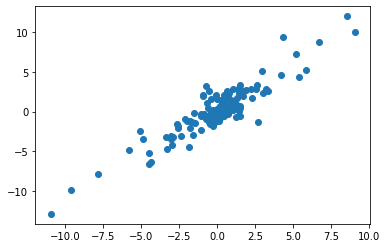

In [41]:
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.scatter(excess_spy, excess_aapl)

#### 5. (3 PTS) Use Linear Algebra (matrices) to Compute the Regression Coefficient Estimate, \\(\hat\beta_i\\)

Hint 1: Here is the matrix formula where *x′* denotes transpose of *x*.

\begin{aligned} \hat\beta_i=(x′x)^{−1}x′y \end{aligned} 

Hint 2: consider numpy functions for matrix multiplication, transpose, and inverse. Be sure to review what these operations do, and how they work, if you're a bit rusty.

In [47]:
transposed = np.transpose(excess_spy)
inner = 1/(np.matmul(transposed, excess_spy))
second = inner * transposed
beta = np.matmul(second, excess_aapl)
print(beta)

1.0885263856551701


You should have found that the beta estimate is greater than one.  
This means that the risk of AAPL stock, given the data, and according to this particular (flawed) model,  
is higher relative to the risk of the S&P 500.


#### Measuring Beta Sensitivity to Dropping Observations (Jackknifing)

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

#### 6. (3 PTS) Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays x and y as inputs
- output a list of tuples. each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [54]:
def beta_sensitivity(x,y):
    ''' description '''
    output_list = []
    for i in range(len(x)):
        delete_x = np.delete(x,i).reshape(-1,1)
        delete_y = np.delete(y,i).reshape(-1,1)
        transposed = np.transpose(delete_x)
        inner = 1/(np.matmul(transposed, delete_x))
        second = inner * transposed
        beta = np.matmul(second, delete_y)
        output_list.append(i, beta)
    return output_list
    
    

#### Call `beta_sensitivity()` and print the first five tuples of output.

In [55]:
beta_sensitivity(excess_spy, excess_aapl).head()

ValueError: Length of values (133) does not match length of index (134)